## Импортируем нужные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## Создаем и визуализируем данные

In [2]:
eta=1
# feature
X  = np.random.rand(100,1)
# target
Y = 2 + 3*X + eta*np.random.rand(100,1)

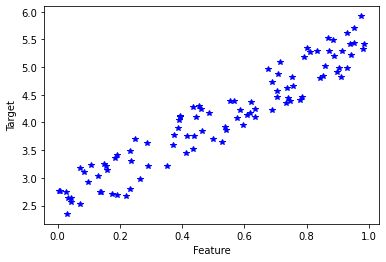

In [3]:
plt.plot(X,Y,'*b')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Рассчитаем коэффициенты линейной регрессии и предскажем таргеты

In [4]:
X_with_ones = np.concatenate((np.ones((100,1)), X), 1)

In [5]:
theta = np.linalg.pinv(X_with_ones).dot(Y)

In [6]:
theta

array([[2.57398997],
       [2.90651512]])

In [7]:
Y_pred = X_with_ones.dot(theta)

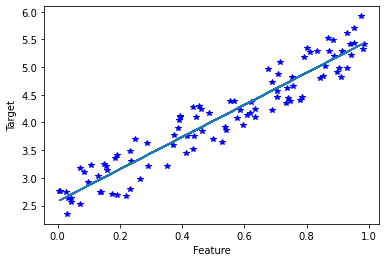

In [8]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Сделаем то же самое с помощью библиотеки sklearn

In [11]:
!pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.5 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=78c29da66d3a8fe11475071b3fafb398cccd7c5816080a6091fecba34fa35556
  Stored in directory: c:\users\xiaomi\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: C:\Users\Xiaomi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X, Y)

LinearRegression()

In [14]:
Y_pred_sklearn = lr.predict(X)

In [15]:
lr.intercept_, lr.coef_

(array([2.57398997]), array([[2.90651512]]))

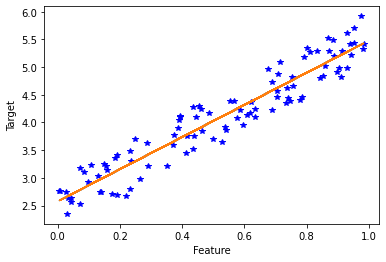

In [16]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_sklearn)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Модель для задачи с несколькими признаками

In [17]:
eta=1
# feature
X  = np.random.rand(100,4)
# target
Y = np.reshape(2 + 3*X[:,0] + 4*X[:,1] + 5*X[:,2] + 6*X[:,3],(100,1)) + eta*np.random.rand(100,1)

In [18]:
Y

array([[ 8.55364266],
       [14.61389553],
       [ 8.36528933],
       [ 9.70208131],
       [12.65870582],
       [14.17300096],
       [10.20260538],
       [ 6.65528543],
       [ 6.58161497],
       [ 6.75367979],
       [15.76471842],
       [15.80928282],
       [14.52722175],
       [14.09227252],
       [15.56818502],
       [13.95714987],
       [ 8.93634974],
       [ 8.30468174],
       [10.57694117],
       [ 7.32710852],
       [11.91301436],
       [ 8.29067375],
       [10.24765404],
       [12.08155639],
       [10.99399742],
       [11.78678745],
       [11.5806626 ],
       [ 8.02013398],
       [13.88950329],
       [12.17870061],
       [10.15073006],
       [13.58384924],
       [ 9.20371558],
       [11.53112592],
       [ 9.52043377],
       [15.11398897],
       [ 7.54475219],
       [ 9.932727  ],
       [ 8.85047093],
       [12.12178482],
       [ 9.14936928],
       [13.40142984],
       [10.84496767],
       [ 9.24442941],
       [13.67743671],
       [ 9

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([[3.0328041 , 4.07369959, 5.04466037, 6.17147103]])

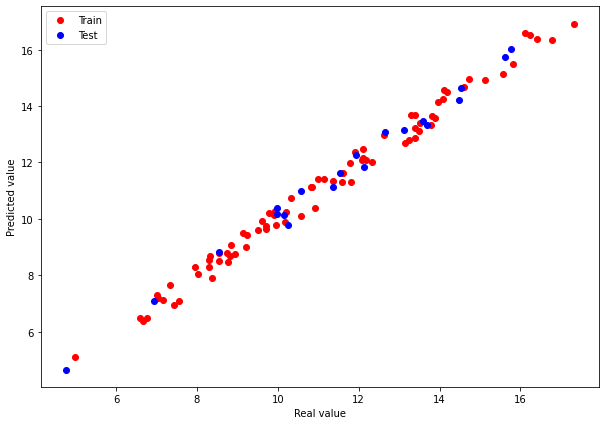

In [22]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Расчет метрики ошибки

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [24]:
mse(y_test, lr.predict(X_test), squared=False)

0.2643868099347905

## Домашнее задание:

Обучить линейную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Steels_kaggle.csv')

In [27]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [28]:
df.shape

(915, 20)

In [29]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [30]:
df[[' C', ' Si']]

,C,Si
0,0.12,0.36
1,0.12,0.36
2,0.12,0.36
3,0.12,0.36
4,0.12,0.36
...,...,...
910,0.22,0.22
911,0.22,0.22
912,0.22,0.22
913,0.22,0.22


## Задание

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [13]:
y = df[' 0.2% Proof Stress (MPa)']
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_


array([ 1.04240999e+02,  1.20165250e+02,  4.34634715e+01, -8.46820203e+02,
       -5.01306349e+02,  1.08736701e+02,  3.94891231e+00,  1.26345813e+02,
        1.25544934e+01,  4.79968698e+02,  4.97018409e+02, -2.70951930e+03,
        2.87410462e+02,  4.81200853e+04, -3.44244768e-01])

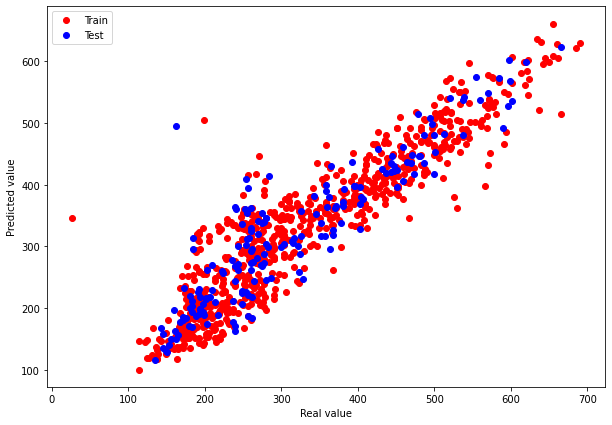

In [14]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [15]:
print(f'test: {mse(y_test, lr.predict(X_test), squared=False)}')
print(f'train: {mse(y_train, lr.predict(X_train), squared=False)}')

test: 52.61456715037921
train: 51.41951042180352
